**Name:** Yuvadarshini S

**Register Number:** 212221230126

In [ ]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
worksheet = gc.open('student_data').sheet1
data = worksheet.get_all_values()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
dataset1 = pd.DataFrame(data[1:], columns=data[0])
dataset1 = dataset1.astype({'input':'float'})
dataset1 = dataset1.astype({'output':'float'})

In [ ]:
dataset1.head()


,input,output
0,99.0,91.0
1,97.0,92.0
2,98.0,93.0
3,96.0,94.0
4,95.0,95.0


In [ ]:
x = dataset1[['input']].values
y = dataset1[['output']].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=33)

In [ ]:
Scaler = MinMaxScaler()


In [ ]:
Scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train1 = Scaler.transform(X_train)

In [ ]:
ai_brain = Sequential([
    Dense(8, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1)
])

In [ ]:
ai_brain.compile(optimizer='adam', loss='mse')

In [ ]:
ai_brain.fit(X_train1, y_train, epochs=2000)

Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8711.2178
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 8709.5195
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 8707.8066
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 8706.0918
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 8704.3730
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 8702.6504
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 8700.9238
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8699.1914
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 8697.4561
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 8695.7148
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 8693.9697
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 8692.2207
Epoch 13/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8690.4668
Epoch 14/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 8688.7080
Epoch 15/2000
1/1 ━━━━━━━━━━━━━

<Axes: >

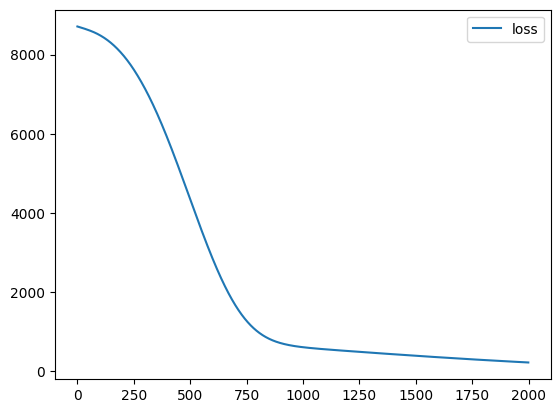

In [16]:
loss_df = pd.DataFrame(ai_brain.history.history)
loss_df.plot()

In [18]:
X_test1=Scaler.transform(X_test)
ai_brain.evaluate(X_test1,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - loss: 865.7556


865.755615234375

In [19]:
X_n1=[[4]]
X_n1=Scaler.transform(X_n1)
ai_brain.predict(X_n1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[41.688374]], dtype=float32)